# Studying the Impact of Diabetes on the Human Body
&#x1F3E5;
---

### Data Cleaning


##### Import the required libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Load the data

In [99]:
raw_data = pd.read_csv('..\diabetes_data.csv')

##### Inspect the data

In [100]:
# Data overview
print('Data Overview:')
raw_data.head()

Data Overview:


,gender,age,hypertension,diabetes_pedigree_function,diet_type,star_sign,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes
0,female,NaN,NaN,0.37,paleo,NaN,NaN,197.7,NaN,Occasionally,Sedentary,1.5,Low,NaN,light,1.0
1,male,59.0,0.0,0.73,NaN,Leo,17.1,156.5,0.0,Occasionally,Lightly Active,5.4,Moderate,0.0,none,1.0
2,female,31.0,NaN,NaN,NaN,NaN,22.5,137.8,NaN,Occasionally,Lightly Active,7.6,Low,0.0,light,1.0
3,female,81.0,1.0,0.37,pescatarian,NaN,NaN,108.2,0.0,NaN,Sedentary,7.7,Low,1.0,heavy,NaN
4,NaN,64.0,0.0,0.55,carnivore,NaN,NaN,179.7,NaN,Occasionally,Sedentary,7.8,NaN,0.0,heavy,1.0


Data Overview Notes: the `diabetes_pedrigree_function` is a functions that scores the probability of diabetes based on family history

In [101]:
# Column Information
print('Column Information:')
print('\n')
raw_data.info()

Column Information:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      79954 non-null  object 
 1   age                         80145 non-null  float64
 2   hypertension                80169 non-null  float64
 3   diabetes_pedigree_function  80120 non-null  float64
 4   diet_type                   79939 non-null  object 
 5   star_sign                   79806 non-null  object 
 6   BMI                         79934 non-null  float64
 7   weight                      80126 non-null  float64
 8   family_diabetes_history     79863 non-null  float64
 9   social_media_usage          79968 non-null  object 
 10  physical_activity_level     80032 non-null  object 
 11  sleep_duration              80063 non-null  float64
 12  stress_level                80024 non-null  object 
 13  pregnanc

In [102]:
# Rows Information
print('Total Number of Rows: ' + str(len(raw_data)))

Total Number of Rows: 100000


In [103]:
# Identifying numerical variables versus number-encoded categorical variables
print('Number-encoded Variables Review:')
raw_data.select_dtypes(include='number').agg(['min', 'median', 'max'])

Number-encoded Variables Review:


,age,hypertension,diabetes_pedigree_function,BMI,weight,family_diabetes_history,sleep_duration,pregnancies,diabetes
min,18.0,0.0,0.2,1.8,50.0,0.0,0.0,0.0,0.0
median,45.0,0.0,0.5,27.0,150.9,0.0,5.3,0.0,1.0
max,91.0,1.0,0.8,53.1,250.0,1.0,12.0,5.0,1.0


In [104]:
#Confirm number-encoded categorical variables
print(raw_data['hypertension'].value_counts())
print('\n')
print(raw_data['family_diabetes_history'].value_counts())
print('\n')
print(raw_data['diabetes'].value_counts())

hypertension
0.0    63955
1.0    16214
Name: count, dtype: int64


family_diabetes_history
0.0    55731
1.0    24132
Name: count, dtype: int64


diabetes
1.0    76626
0.0     3616
Name: count, dtype: int64


By studying the results above, it is possible to concluded that:
- `age`, `diabetes_pedrigree_function`, `BMI`, `weight`, `sleep_duration`, and `pregnancies` are numerical variables 
- `hypertension`, `family_diabetes_history`, and `diabetes` are categorical variables enconded as 1 and 0
- `gender`, `diet_type`, `star_sign`, `social_media_usage`, `physical_activity_level`, `stress_level`, and `alcohol_consumption` are categorical variables

In [105]:
# Numerical Variables Statistics
print('Numerical Variables Statistics:')
raw_data[['age','diabetes_pedigree_function', 'BMI', 'weight', 'sleep_duration', 'pregnancies']].describe()

Numerical Variables Statistics:


,age,diabetes_pedigree_function,BMI,weight,sleep_duration,pregnancies
count,80145.000000,80120.000000,79934.000000,80126.000000,80063.000000,80033.000000
mean,45.107306,0.500877,26.978545,150.526618,5.295149,0.758212
std,18.550434,0.173783,6.005039,57.731539,2.842133,1.281326
min,18.000000,0.200000,1.800000,50.000000,0.000000,0.000000
25%,27.000000,0.350000,22.900000,100.300000,3.300000,0.000000
50%,45.000000,0.500000,27.000000,150.900000,5.300000,0.000000
75%,60.000000,0.650000,31.000000,200.400000,7.000000,1.000000
max,91.000000,0.800000,53.100000,250.000000,12.000000,5.000000


### Handle Missing Values

#### Overview

In [106]:
# Percentage of missing values in each column
print('Percentage of missing values in each column:')
raw_data.isnull().mean()

Percentage of missing values in each column:


gender                        0.20046
age                           0.19855
hypertension                  0.19831
diabetes_pedigree_function    0.19880
diet_type                     0.20061
star_sign                     0.20194
BMI                           0.20066
weight                        0.19874
family_diabetes_history       0.20137
social_media_usage            0.20032
physical_activity_level       0.19968
sleep_duration                0.19937
stress_level                  0.19976
pregnancies                   0.19967
alcohol_consumption           0.20104
diabetes                      0.19758
dtype: float64

[]

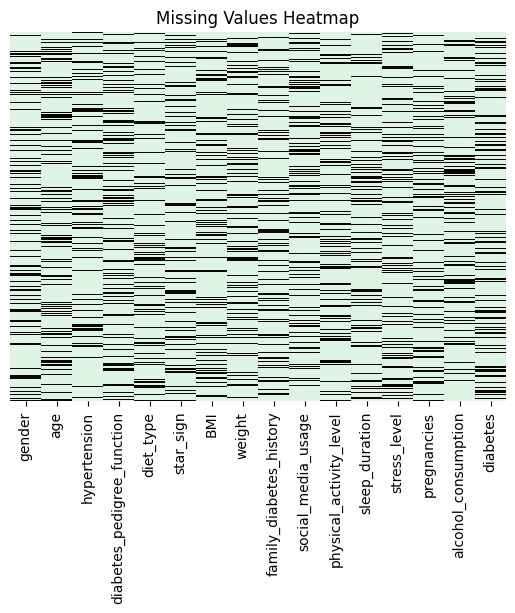

In [107]:
# Missing values heatmap
plt.figure()
plt.title('Missing Values Heatmap')
fig = sns.heatmap(raw_data.isnull(), cmap='mako_r', cbar=False)
fig.set_yticks([])

From the missing values heatmap, it is possible to conclude that missing data is random rather than systematically located within the dataset

<Axes: title={'center': 'Correlation Matrix'}>

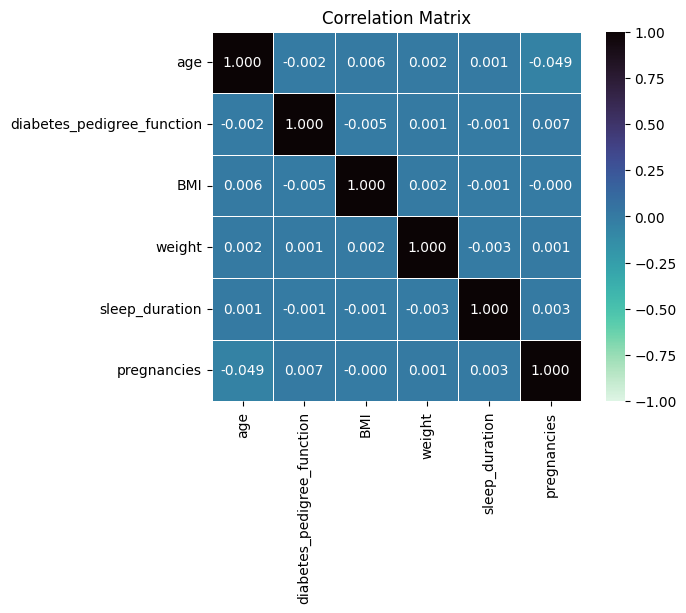

In [108]:
# Correlation Matrix
corr_matrix = raw_data[['age','diabetes_pedigree_function', 'BMI', 'weight', 'sleep_duration', 'pregnancies']].corr()
plt.figure()
plt.title('Correlation Matrix')
sns.heatmap(
    corr_matrix,
    annot=True,        
    cmap='mako_r',   
    fmt=".3f",         
    linewidths=0.5,    
    cbar=True,         
    square=True,
    vmin=-1,
    vmax=1,
    center=0     
)

No significant correlations are identified from the correlation matrix

#### Numerical Variables: Data distributions

##### Age

Text(0, 0.5, 'Count')

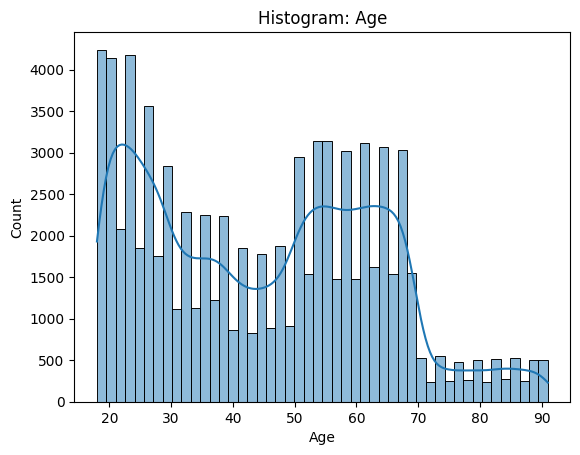

In [211]:
# Age
sns.histplot(raw_data, x = 'age', kde=True)
plt.title('Histogram: Age')
plt.xlabel('Age')
plt.ylabel('Count')

##### BMI

Text(0, 0.5, 'Count')

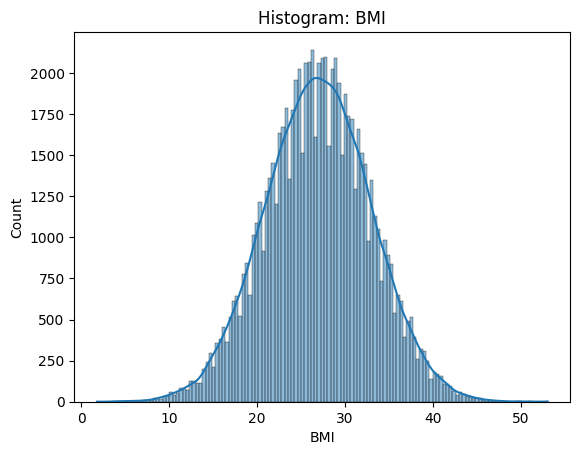

In [111]:
# BMI
sns.histplot(raw_data, x='BMI', kde=True)
plt.title('Histogram: BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

##### Weight

Text(0, 0.5, 'Count')

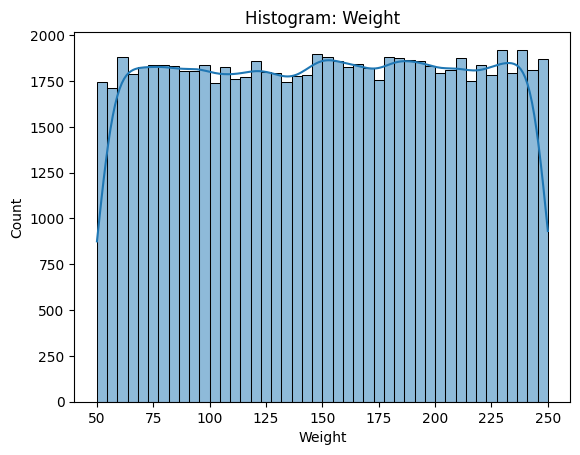

In [113]:
# Weight
sns.histplot(raw_data, x='weight', kde=True)
plt.title('Histogram: Weight')
plt.xlabel('Weight')
plt.ylabel('Count')

##### Sleep Duration

Text(0, 0.5, 'Count')

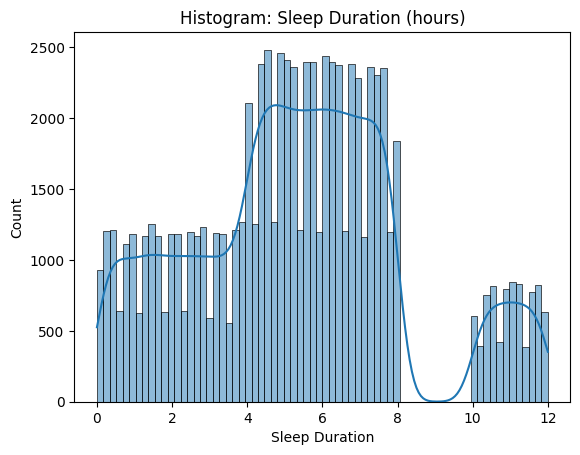

In [36]:
# Sleep Duration
sns.histplot(raw_data['sleep_duration'], kde=True)
plt.title('Histogram: Sleep Duration (hours)')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')

#### Numerical Variables: Data Imputations

In [ ]:
# Creates a copy of the data for imputation
mv_data = raw_data.copy()

##### Age

The `age` variable has a non uniform distribution. Therefore to input the missing values, is is necessary to use bins for the the different spike-points and leverage the mean of each bin to input missing values in the same proportion as they occur in the data. With this approach the resulting data distribution is altered due to the concentration of data around the mean of each bin, though preserving the nature of the relationship across variables.

Text(0, 0.5, 'Count')

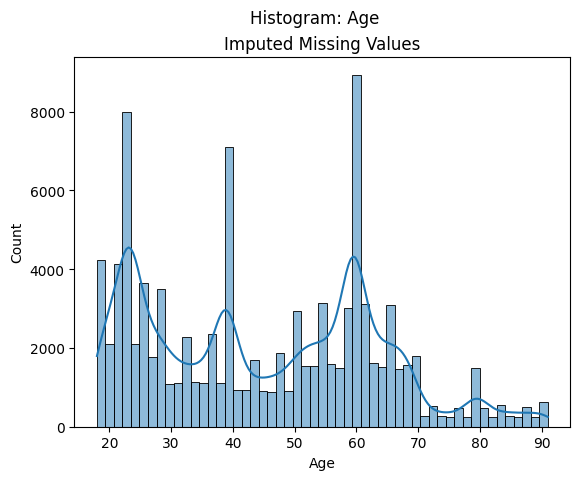

In [212]:
# Impute missing values for age (sampling from a weighed list with the mean across 5 bins of ages)
age_ranges = [(18, 30), (30, 50), (50, 70), (70, 90), (90, 92), (92, 100)]
total_count = raw_data['age'].notnull().sum()
mean_ages = []
prob_ages = []

for i in range (len(age_ranges) - 1):
    bin_filter = (raw_data['age'] >= age_ranges[i][0]) & (raw_data['age'] < age_ranges[i+1][0])
    mean_ages.append(float(raw_data.loc[bin_filter, 'age'].mean()))
    prob_ages.append(float(len(raw_data.loc[bin_filter, 'age']) / total_count))

sample_ages = pd.Series(np.random.choice(mean_ages, size=int(len(raw_data['age'])), p=prob_ages))
mv_data['age'] = mv_data['age'].fillna(sample_ages[mv_data['age'].isna()])

# Regenerates the Histogram
sns.histplot(mv_data, x = 'age', kde=True)
plt.suptitle('Histogram: Age')
plt.title('Imputed Missing Values')
plt.xlabel('Age')
plt.ylabel('Count')

##### BMI
The `BMI` variable approximates a normal distribution which can be leveraged to input its missing values by sampling from a normal distribution with the corresponding mean and std. This approach is an approximation based on the low correlation with other numerical variables, as well as the random nature of the missing values. It also aims to preserve the nature of the relationship with the categorical variables

Text(0, 0.5, 'Count')

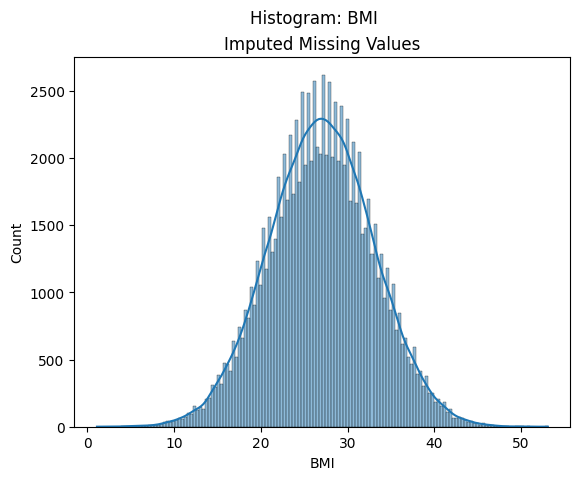

In [112]:
# Impute missing values for BMI (normal distribution sampling)
mean_bmi = float(raw_data['BMI'].mean())
std_bmi = float(raw_data['BMI'].std())

missing_filter = mv_data['BMI'].isnull()
mv_data.loc[missing_filter, 'BMI'] = np.random.normal(mean_bmi, std_bmi, size=missing_filter.sum())

#Regenerates Histogram
sns.histplot(mv_data,x='BMI', kde=True)
plt.suptitle('Histogram: BMI')
plt.title('Imputed Missing Values')
plt.xlabel('BMI')
plt.ylabel('Count')

##### Weight
The `Weight` variable approximates a uniform distribution which can be leveraged to input its missing values by sampling from a uniform distribution with the corresponding min and max values. This approach is an approximation based on the low correlation with other numerical variables, as well as the random nature of the missing values. It also aims to preserve the nature of the relationship with the categorical variables

Text(0, 0.5, 'Count')

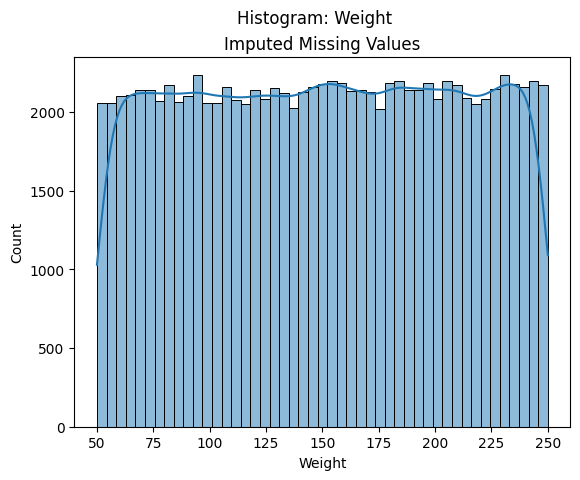

In [ ]:
# Impute missing values for weight (uniform distribution sampling)
min_weight = float(raw_data['weight'].min())
max_weight = float(raw_data['weight'].max())

missing_filter = mv_data['weight'].isnull()
mv_data.loc[missing_filter, 'weight'] = np.random.uniform(min_weight, max_weight, size=missing_filter.sum())

# Regenerates histogram
sns.histplot(mv_data, x='weight', kde=True)
plt.suptitle('Histogram: Weight')
plt.title('Imputed Missing Values')
plt.xlabel('Weight')
plt.ylabel('Count')

##### Sleeping Duration

In a similar form to the distribution found for the `age` varibale, the `sleeping_duration` variable has a non-uniform distribution. Therefore, a similar approach, leveraging bins and the mean per bin, can be used to input the missing values.

Text(0, 0.5, 'Count')

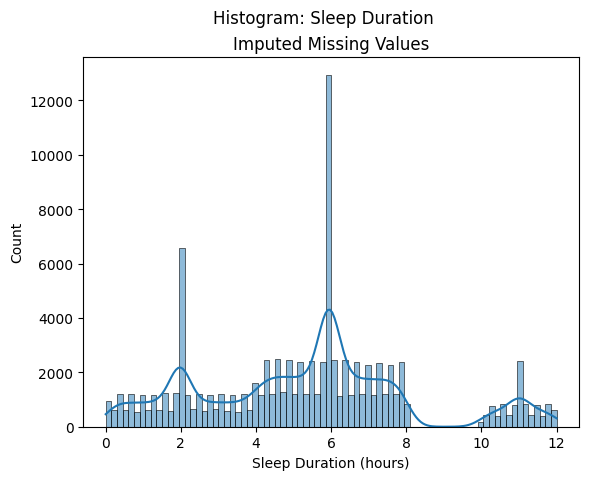

In [256]:
# Impute missing values for sleeping duration (sampling from a weighed list with the mean across 5 bins of ages)
sleep_ranges = [(0, 4), (4, 8), (8, 10), (10, 13), (13, 24)]
total_count = raw_data['sleep_duration'].notnull().sum()
mean_sleep = []
prob_sleep = []

for i in range (len(sleep_ranges) - 1):
    bin_filter = (raw_data['sleep_duration'] >= sleep_ranges[i][0]) & (raw_data['sleep_duration'] < sleep_ranges[i+1][0])
    mean_sleep.append(float(raw_data.loc[bin_filter, 'sleep_duration'].mean()))
    prob_sleep.append(float(len(raw_data.loc[bin_filter, 'sleep_duration'])/total_count))

sample_sleep = pd.Series(np.random.choice(mean_sleep, size=int(len(raw_data['sleep_duration'])), p=prob_sleep))
mv_data['sleep_duration'] = mv_data['sleep_duration'].fillna(sample_sleep[mv_data['sleep_duration'].isna()])

# Regenerates histogram
sns.histplot(mv_data, x='sleep_duration', kde=True)
plt.suptitle('Histogram: Sleep Duration')
plt.title('Imputed Missing Values')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Count')

##### Pregnancies

For the pregnacies variable, assuming the data does not inlcude reccords for trans people, all missing values for males can be replaced with 0. Nonetheless, it is important to double check the assumption with expert input.

In [257]:
mv_data.loc[(mv_data['gender'] == 'male') & (mv_data['pregnancies'].isna()), 'pregnancies'] = 0